# Step 1: Import Libraries

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

# Step 2: Load Dataset

In [4]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.shape

(6607, 20)

# Step 3: Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(f'{i} has: {df[i].isnull().sum()/df.shape[0]}')
  else:
    print(f'{i} is not null')

Hours_Studied is not null
Attendance is not null
Parental_Involvement is not null
Access_to_Resources is not null
Extracurricular_Activities is not null
Sleep_Hours is not null
Previous_Scores is not null
Motivation_Level is not null
Internet_Access is not null
Tutoring_Sessions is not null
Family_Income is not null
Teacher_Quality has: 0.011805660662933253
School_Type is not null
Peer_Influence is not null
Physical_Activity is not null
Learning_Disabilities is not null
Parental_Education_Level has: 0.013621916149538369
Distance_from_Home has: 0.010140759800211896
Gender is not null
Exam_Score is not null


In [9]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])

In [10]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

In [11]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [16]:
df.duplicated().sum()

np.int64(0)

# Step 4: Encoding Categorical Columns

In [12]:
cols = ['Motivation_Level', 'Parental_Involvement', 'Access_to_Resources', 'Family_Income', 'Teacher_Quality']
categories = [['Low', 'Medium', 'High']] * len(cols)
encoder = OrdinalEncoder(categories=categories)
df[cols] = encoder.fit_transform(df[cols]).astype(int)

In [13]:
le = LabelEncoder()
cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [14]:
cols = ['Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
encoder = OrdinalEncoder(categories=[
    ['Negative', 'Neutral', 'Positive'],         # Attitude
    ['High School', 'College', 'Postgraduate'],  # Parental Education
    ['Near', 'Moderate', 'Far']                  # Distance
])
df[cols] = encoder.fit_transform(df[cols]).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

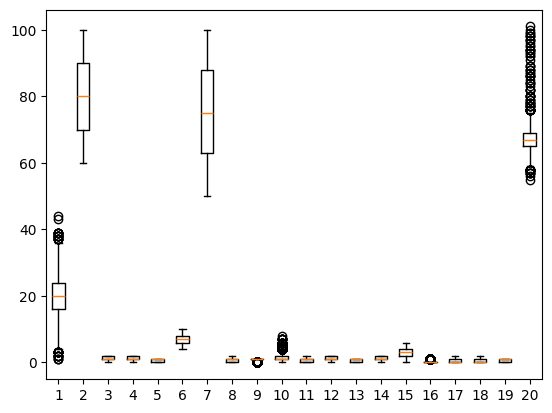

In [17]:
plt.boxplot(df)
plt.show()

In [18]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
df=df[~((df<lb)|(df>ub)).any(axis=1)]

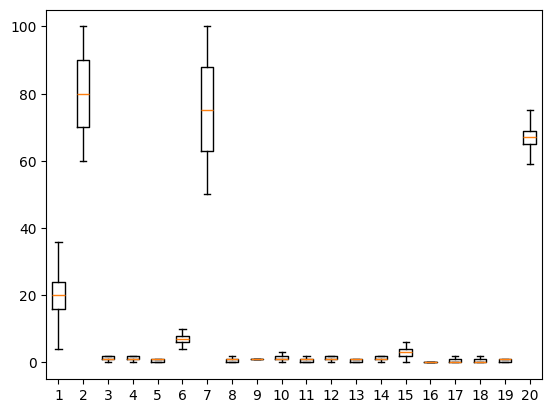

In [19]:
plt.boxplot(df)
plt.show()

In [20]:
df.shape

(5016, 20)

# Step 5: Exploratory Data Analysis (EDA)

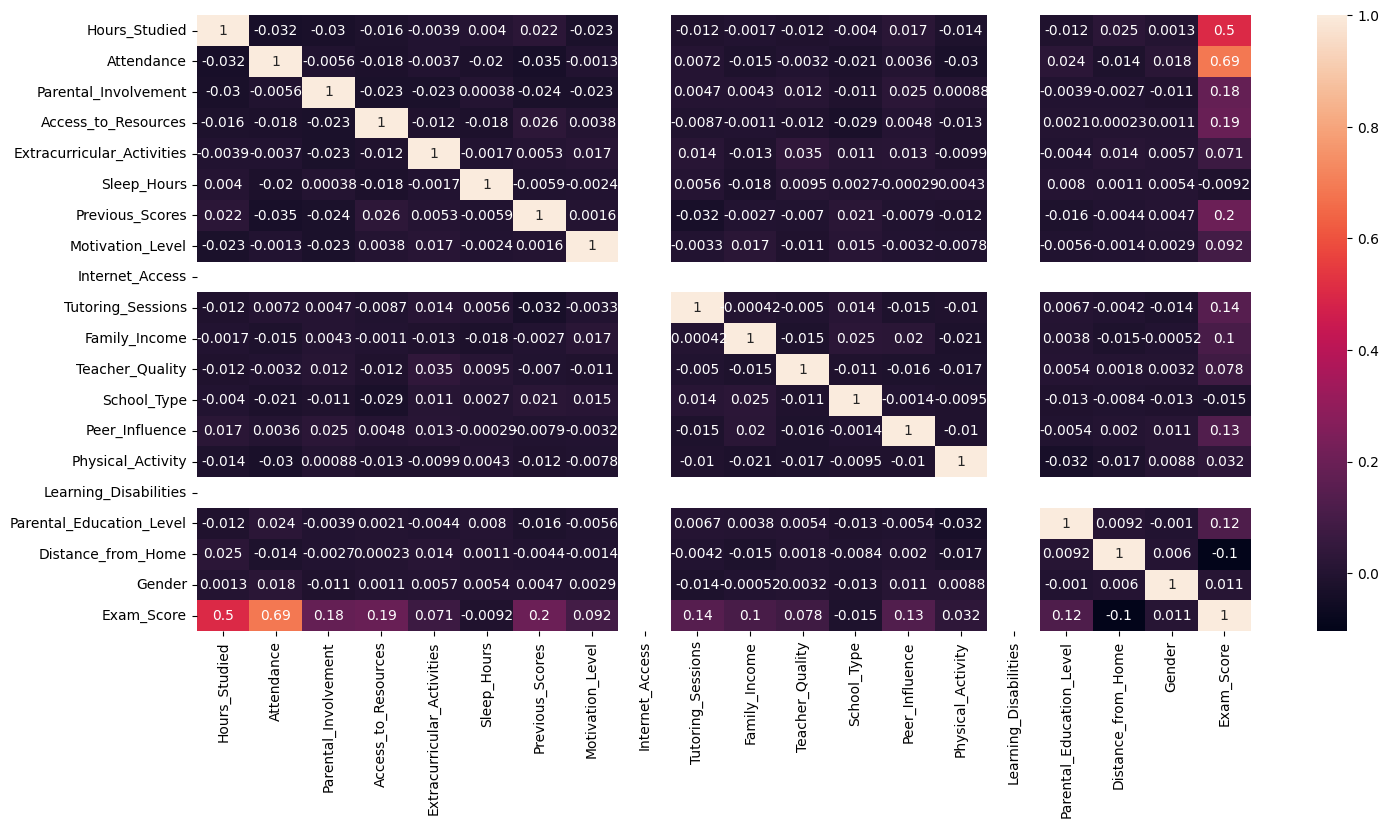

In [25]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [26]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

# Step 6: Feature Selection (X, y)

In [27]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [28]:
log=FunctionTransformer(func=np.log1p)
y=log.fit_transform(y)

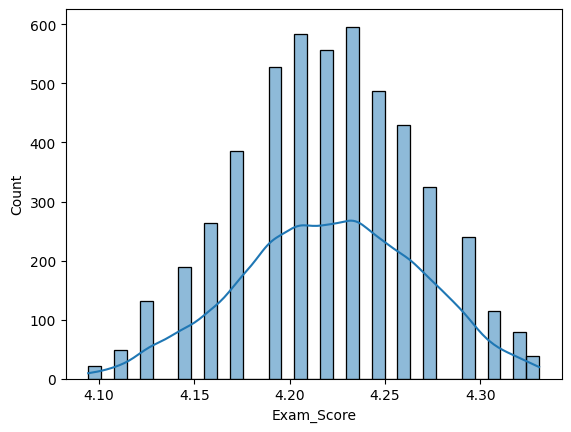

In [29]:
sns.histplot(y, kde=True)
plt.show()

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5016 entries, 0 to 6606
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               5016 non-null   int64
 1   Attendance                  5016 non-null   int64
 2   Parental_Involvement        5016 non-null   int64
 3   Access_to_Resources         5016 non-null   int64
 4   Extracurricular_Activities  5016 non-null   int64
 5   Sleep_Hours                 5016 non-null   int64
 6   Previous_Scores             5016 non-null   int64
 7   Motivation_Level            5016 non-null   int64
 8   Internet_Access             5016 non-null   int64
 9   Tutoring_Sessions           5016 non-null   int64
 10  Family_Income               5016 non-null   int64
 11  Teacher_Quality             5016 non-null   int64
 12  School_Type                 5016 non-null   int64
 13  Peer_Influence              5016 non-null   int64
 14  Physical_Acti

In [31]:
y.info()

<class 'pandas.core.series.Series'>
Index: 5016 entries, 0 to 6606
Series name: Exam_Score
Non-Null Count  Dtype  
--------------  -----  
5016 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [32]:
X.shape

(5016, 19)

In [33]:
y.shape

(5016,)

# Step 7: Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,random_state=42)

# Step 8: Scaling

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.004071334386312076
RMSE: 0.004897834835753815
R²: 0.9892444968643302


# Step 10: Polynomial Regression Model

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

poly_reg.fit(X_train, y_train)
y_poly_pred = poly_reg.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression Results:")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R²:", r2_poly)


Polynomial Regression Results:
MAE: 0.003994619239196241
RMSE: 0.004777726481046838
R²: 0.9897655378023367


# Step 11: Results Comparison

                   Model       MAE      RMSE        R²
0      Linear Regression  0.004071  0.004898  0.989244
1  Polynomial Regression  0.003995  0.004778  0.989766


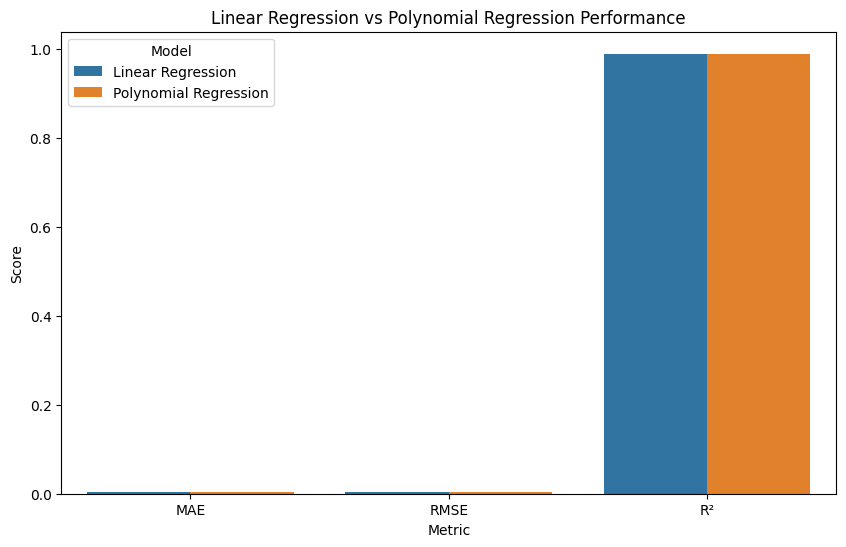

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
results = {
    "Model": ["Linear Regression", "Polynomial Regression"],
    "MAE": [mae, mae_poly],
    "RMSE": [rmse, rmse_poly],
    "R²": [r2, r2_poly]
}
results_df = pd.DataFrame(results)
print(results_df)
results_df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10,6))
sns.barplot(data=results_df_melted, x="Metric", y="Score", hue="Model")
plt.title("Linear Regression vs Polynomial Regression Performance")
plt.ylabel("Score")
plt.show()
